<a href="https://colab.research.google.com/github/gajanankumar/Regression_Capstone_Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## <b> Data Information </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>
Dataset contains 8760 rows and 14 columns 

### <b>Attribute Information: </b>

* ### Date : year-month-day(object)
* ### Rented Bike count - Count of bikes rented at each hour(Integer)
* ### Hour - Hour of he day(Integer)
* ### Temperature-Temperature in Celsius(Numeric)
* ### Humidity - %(Integer)
* ### Windspeed - m/s(Numeric)
* ### Visibility - 10m (Integer)
* ### Dew point temperature - Celsius (Numeric)
* ### Solar radiation - MJ/m2(Numeric)
* ### Rainfall - mm(Numeric)
* ### Snowfall - cm(Numeric)
* ### Seasons - Winter, Spring, Summer, Autumn(object)
* ### Holiday - Holiday/No holiday(object)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)(object)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/mlprojects/SeoulBikeData.csv',encoding='cp1252')

### Exploring Data

In [ ]:
#Getting first 5 records from dataset
dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
dataset.info() # Getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above infomation we conclude that dataset contains 14 columns and 8760 records. it contains all records non null.

In [ ]:
dataset.describe() # getting statistical summary about numerical features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
dataset.describe(include='all') # getting statistical summary including all features

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**checking duplicate values**

In [ ]:
#chcking duplicate records in dataset
len(dataset[dataset.duplicated()])

0

**Checking for null values**

In [ ]:
dataset.isna().sum() # checking missing values in dataset

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# checking unique values 
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**From above result we conclude that here in this dataset no missing values and not any duplicated records present.**

In [ ]:
dataset.columns # checking features names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Renaming columns for convinence 
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
dataset.columns # checking features names

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
dataset['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [ ]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

##Exploratory data analysys

In [ ]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Changing date feature datatype to datetime

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'].dtype

dtype('<M8[ns]')

In [ ]:
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

dataset['day'] = dataset['Date'].dt.day_name()

In [ ]:
dataset['day']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: day, Length: 8760, dtype: object

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
dataset['weekday_weekend']=dataset['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [ ]:
# checking no of weekdays and weekends
dataset['weekday_weekend'].value_counts()

weekday    6216
weekend    2544
Name: weekday_weekend, dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekday_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

we convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [ ]:
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.

dataset=dataset.drop(columns=['Date','day','year'],axis=1)

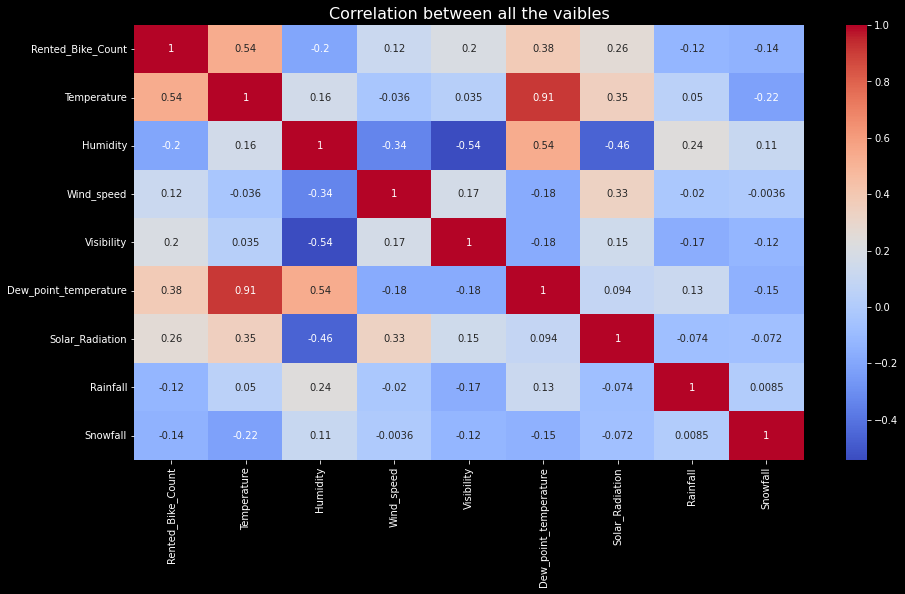

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### Obeservations:
##### Dew point temperature and temperature are highly related.
###### Humidity has low correlation with visibility due to solar radiation.

In [ ]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Rainfall',
 'Snowfall',
 'Rented_Bike_Count',
 'Dew_point_temperature',
 'Visibility',
 'Solar_Radiation',
 'Humidity',
 'Temperature',
 'Wind_speed']

**Multicolinearity check**

In [ ]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                 feature    VIF
0               Rainfall   1.10
1               Snowfall   1.12
2      Rented_Bike_Count   3.62
3  Dew_point_temperature  16.04
4             Visibility   9.06
5        Solar_Radiation   2.89
6               Humidity   5.09
7            Temperature  34.56
8             Wind_speed   4.57


**Here VIF for  Dew_point_temperature and Temperature greater than 10 so need to drop one of them.**

In [ ]:
# Droping highly correlated features for eleminating Multico-linearity
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

###**Univariate Analysis :**

In [ ]:
# cateogrical feature 

cat_features = list(set(dataset.describe(include = 'all')) - set(dataset.describe()))
cat_features

['Functioning_Day', 'weekday_weekend', 'month', 'Seasons', 'Holiday', 'Hour']

In [ ]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Rainfall',
 'Snowfall',
 'Rented_Bike_Count',
 'Visibility',
 'Solar_Radiation',
 'Humidity',
 'Temperature',
 'Wind_speed']

In [ ]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

             feature   VIF
0           Rainfall  1.10
1           Snowfall  1.12
2  Rented_Bike_Count  3.43
3         Visibility  4.71
4    Solar_Radiation  2.25
5           Humidity  4.83
6        Temperature  4.42
7         Wind_speed  4.21


**Checking Skewness in features**

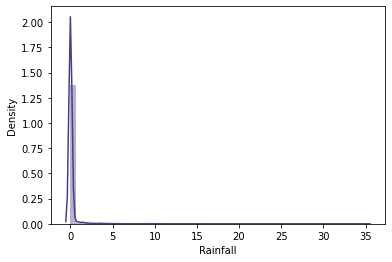

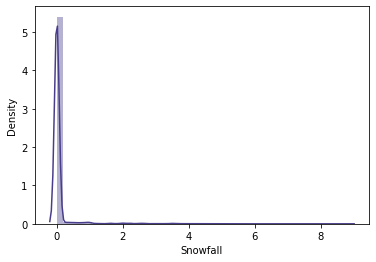

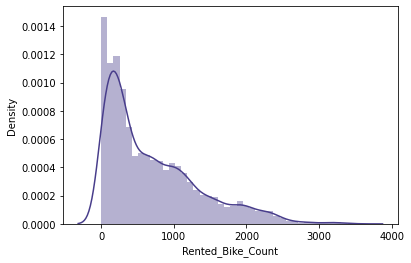

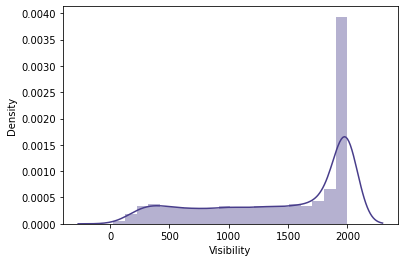

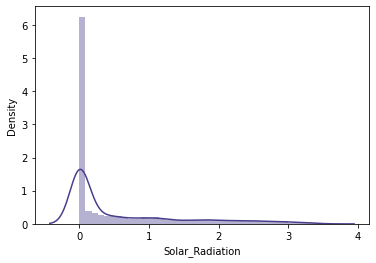

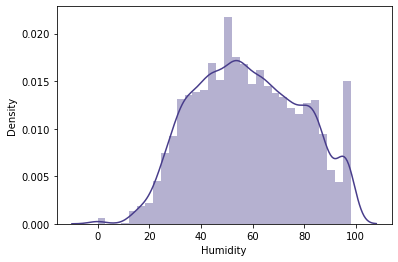

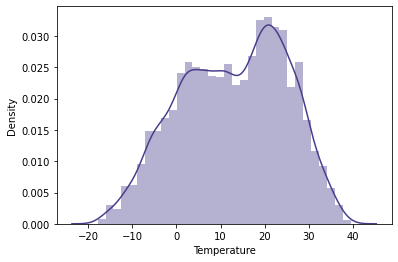

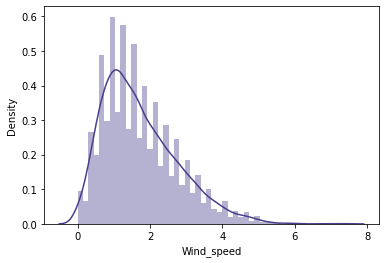

In [ ]:
#plotting distplots to analyze the distribution of all numerical features
for feat in num_features:
  plt.figure(figsize=(6,4))
  sns.distplot(x=dataset[feat],color= 'darkslateblue')
  plt.xlabel(feat)
plt.show()

**From above plot we conclude that for some fetures distributions are rightly skewed and for some leftly skewed.**

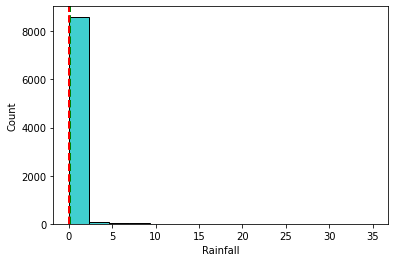

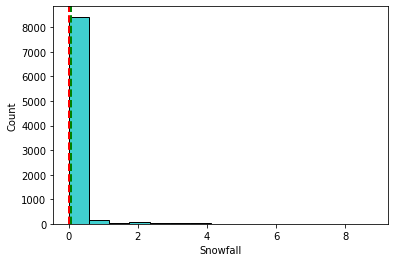

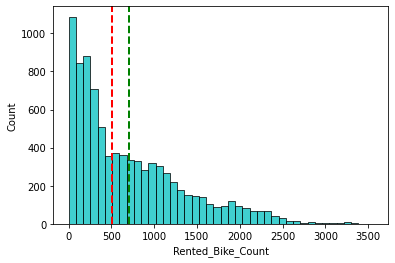

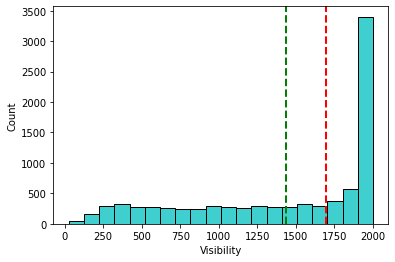

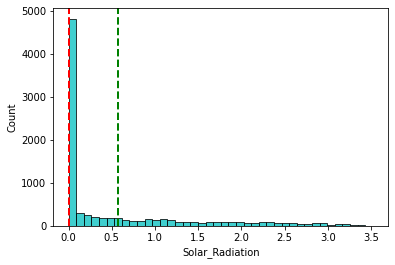

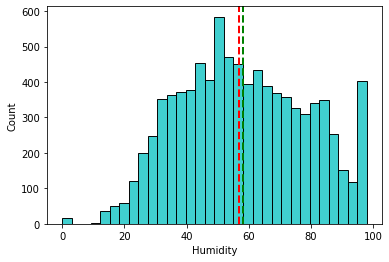

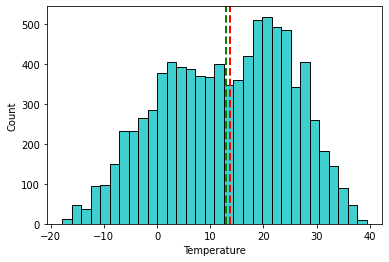

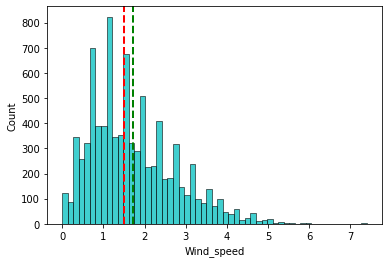

In [ ]:
#plotting histogram with mean and median

for col in num_features:
  sns.histplot(dataset[col],color= 'c')
  plt.axvline(dataset[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**The features which are skewed, their mean and the median are also skewed.**
**Rented_bike_count is right skewed.**

**Outliers Detection using Box plot**

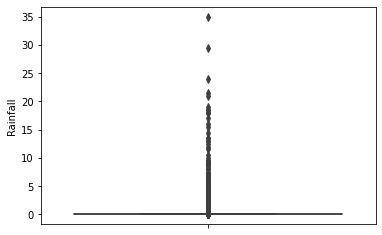

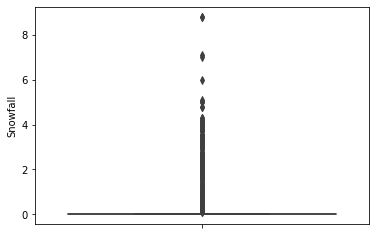

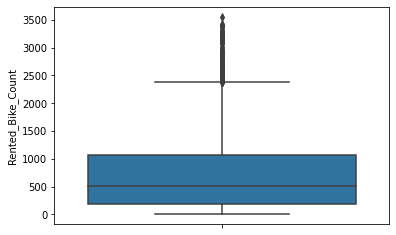

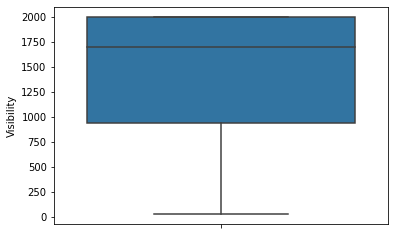

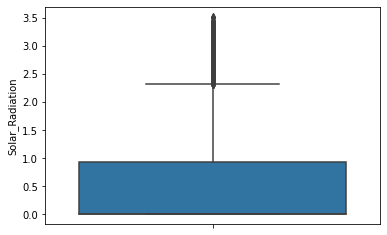

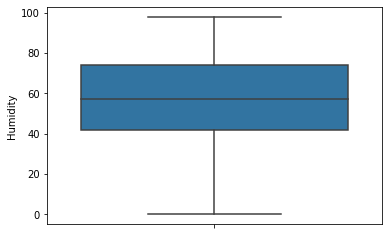

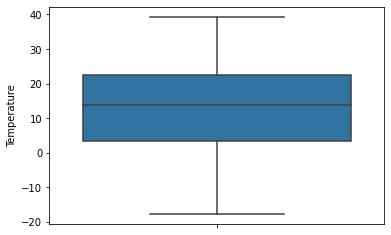

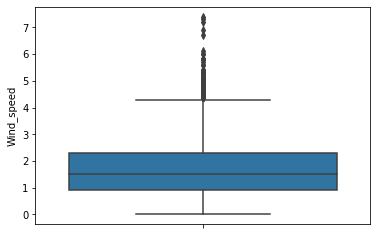

In [ ]:
# Numerical features plotting Box plot
for nfet in num_features:
    sns.boxplot(y = dataset[nfet])
    plt.show()

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
# finding the inter-quartile range 

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count     874.25
Temperature            19.00
Humidity               32.00
Wind_speed              1.40
Visibility           1060.00
Solar_Radiation         0.93
Rainfall                0.00
Snowfall                0.00
dtype: float64


In [ ]:
# listing features to remove outliers

features = list(dataset.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning_Day','month','year','weekday_weekend']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

**Outlier Treatment**

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    print( "lwr_bound:",lwr_bound )
    upr_bound = q3+(1.5*IQR)
    print("upper_bound",upr_bound )
    # print(lwr_bound, upr_bound)
    # Computing 5th, 90th percentiles and replacing the outliers
    fifth_percentile = np.percentile(data,5)
    ninetyfifth_percentile = np.percentile(data,98)
    print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


In [ ]:
sample_outliers = detect_outliers_iqr(dataset['Wind_speed'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1.1999999999999997
upper_bound 4.3999999999999995
5th and 98th percentile: 0.4 4.3
Outliers from IQR method:  []


In [ ]:
dataset['Wind_speed']

0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: Wind_speed, Length: 8760, dtype: float64

In [ ]:
# Computing 5th, 90th percentiles and replacing the outliers
fifth_percentile = np.percentile(dataset['Wind_speed'], 5)
ninetyfifth_percentile = np.percentile(dataset['Wind_speed'], 98)
print(fifth_percentile, ninetyfifth_percentile)
#b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
q1 = np.percentile(dataset['Wind_speed'], 25)
q3 = np.percentile(dataset['Wind_speed'], 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
print( lwr_bound )
upr_bound = q3+(1.5*IQR)
print(upr_bound )
print(dataset['Wind_speed'][82:90])
dataset["Wind_speed"].mask(dataset["Wind_speed"] >upr_bound, ninetyfifth_percentile, inplace=True)
dataset["Wind_speed"].mask(dataset["Wind_speed"] <lwr_bound,fifth_percentile, inplace=True)
print(dataset['Wind_speed'][82:90])


0.4 4.3
-1.1999999999999997
4.3999999999999995
82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64
82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


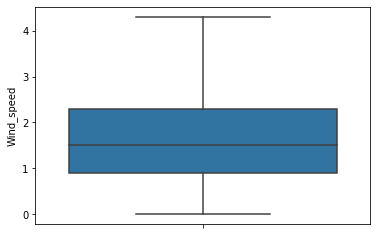

In [ ]:

sns.boxplot(y = dataset['Wind_speed'])
plt.show()

In [ ]:
for i in sample_outliers:
    if i>upr_bound:
      c = np.where(dataset['Wind_speed']==i,ninetyfifth_percentile,dataset['Wind_speed'])
    else:
      c = np.where(dataset['Wind_speed']==i,fifth_percentile, dataset['Wind_speed'])

print("Sample: ", dataset['Wind_speed'])
print("New array: ",c)
# print(x.dtype)

Sample:  0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: Wind_speed, Length: 8760, dtype: float64
New array:  [2.2 0.8 1.  ... 0.3 1.  1.3]


In [ ]:
print(dataset['Wind_speed'][82:90])

82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


In [ ]:
sample_outliers = detect_outliers_iqr(dataset['Solar_Radiation'])
print("Outliers from IQR method: ", sample_outliers)

-1.395
2.325
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.36, 2.36

In [ ]:
# Computing 5th, 90th percentiles and replacing the outliers
def Outliers_imputing(lp,up,data):
  fifth_percentile = np.percentile(data,lp)
  ninetyfifth_percentile = np.percentile(data,up)
  print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
  #b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data,75)
  # print(q1, q3)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  print( "Lower_bound:",lwr_bound )
  upr_bound = q3+(1.5*IQR)
  print("Upper_bound:",upr_bound )
  #print(dataset['Wind_speed'][82:90])
  b=np.where(data >upr_bound)
  print(b)
  b=np.where(data <lwr_bound)
  print(b)
  data.mask(data >upr_bound, ninetyfifth_percentile, inplace=True)
  data.mask(data <lwr_bound,fifth_percentile, inplace=True)
  #print(dataset['Wind_speed'][82:90])
  return data

In [ ]:
outr=Outliers_imputing(5,99,dataset['Solar_Radiation'])
outr

5th and 98th percentile: 0.0 2.24
Lower_bound: -1.395
Upper_bound: 2.325
(array([], dtype=int64),)
(array([], dtype=int64),)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Solar_Radiation, Length: 8760, dtype: float64

In [ ]:
dataset['Solar_Radiation'].loc[1741]      

2.0510000000000033

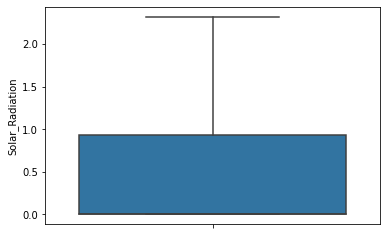

In [ ]:
sns.boxplot(y = dataset['Solar_Radiation'])
plt.show()

In [ ]:
sample_outliers = detect_outliers_iqr(dataset['Rented_Bike_Count'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1132.0
upper_bound 2372.0
5th and 98th percentile: 4.3 2355.0
Outliers from IQR method:  [2375.0, 2377.0, 2378.0, 2378.0, 2379.0, 2383.0, 2387.0, 2391.0, 2392.0, 2397.0, 2398.0, 2400.0, 2401.0, 2401.0, 2402.0, 2403.0, 2404.0, 2404.0, 2404.0, 2405.0, 2405.0, 2410.0, 2415.0, 2415.0, 2416.0, 2419.0, 2422.0, 2429.0, 2430.0, 2431.0, 2432.0, 2435.0, 2436.0, 2439.0, 2440.0, 2441.0, 2443.0, 2445.0, 2450.0, 2451.0, 2454.0, 2455.0, 2456.0, 2460.0, 2460.0, 2468.0, 2474.0, 2474.0, 2475.0, 2476.0, 2479.0, 2479.0, 2481.0, 2481.0, 2487.0, 2489.0, 2491.0, 2493.0, 2495.0, 2497.0, 2497.0, 2499.0, 2505.0, 2505.0, 2508.0, 2514.0, 2514.0, 2515.0, 2518.0, 2519.0, 2525.0, 2528.0, 2534.0, 2556.0, 2557.0, 2558.0, 2574.0, 2577.0, 2579.0, 2594.0, 2598.0, 2602.0, 2612.0, 2613.0, 2615.0, 2618.0, 2628.0, 2631.0, 2632.0, 2635.0, 2636.0, 2637.0, 2640.0, 2649.0, 2650.0, 2656.0, 2661.0, 2664.0, 2692.0, 2692.0, 2701.0, 2716.0, 2732.0, 2741.0, 2770.0, 2779.0, 2787.0, 2788.0, 2797.0, 2797.0, 2807.0, 2809.0, 28

In [ ]:
outr=Outliers_imputing(5,98,dataset['Rented_Bike_Count'])
outr

5th and 98th percentile: 4.3 2355.0
Lower_bound: -1132.0
Upper_bound: 2372.0
(array([2946, 2994, 3114, 3210, 3282, 3498, 3522, 3546, 3618, 3714, 3785,
       3834, 3835, 3882, 3928, 3929, 3954, 3978, 4072, 4074, 4098, 4122,
       4123, 4170, 4171, 4194, 4218, 4290, 4291, 4338, 4339, 4362, 4363,
       4386, 4387, 4435, 4436, 4458, 4459, 4460, 4461, 4482, 4483, 4485,
       4530, 4531, 4554, 4555, 4556, 4601, 4616, 4640, 4650, 4651, 4652,
       4653, 4672, 4673, 4674, 4675, 4698, 4721, 4722, 4723, 4724, 4745,
       4746, 4747, 4748, 4749, 4770, 4771, 4772, 4796, 4808, 4818, 4819,
       4820, 4821, 4832, 4842, 4843, 4844, 4866, 4867, 4868, 4869, 4890,
       4891, 4892, 4940, 4962, 4963, 4964, 5010, 5011, 5058, 5059, 5154,
       5155, 5156, 5178, 5179, 5180, 5202, 5226, 5227, 5346, 5370, 5394,
       5466, 5490, 5514, 5538, 5562, 5634, 5682, 6210, 6234, 6306, 6330,
       6354, 6570, 6666, 6667, 6690, 6691, 6714, 6738, 6810, 6811, 6834,
       6835, 6848, 6858, 6859, 6882, 6906, 697

0        254.0
1        204.0
2        173.0
3        107.0
4         78.0
         ...  
8755    1003.0
8756     764.0
8757     694.0
8758     712.0
8759     584.0
Name: Rented_Bike_Count, Length: 8760, dtype: float64

In [ ]:
dataset['Rented_Bike_Count'][2946]

2355.0

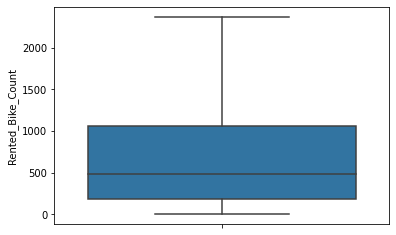

In [ ]:
sns.boxplot(y = dataset['Rented_Bike_Count'])
plt.show()

In [ ]:
#'Rainfall',
#'Snowfall'
sample_outliers = detect_outliers_iqr(dataset['Rainfall'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 2.0
Outliers from IQR method:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [ ]:
sample_outliers = detect_outliers_iqr(dataset['Snowfall'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 1.3
Outliers from IQR method:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   float64 
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   category
dtypes: category(3), float64(6), int64(2), object(3)
memory usage: 779.8+ KB


**From above box plot we conclude that outliers are found in Rented_Bike_Count, Wind_speed, in snowfall and rainfall.**

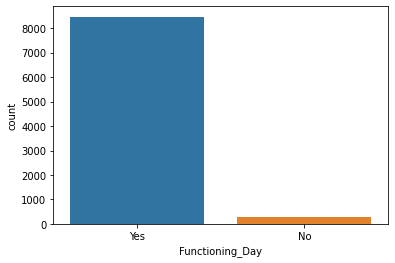

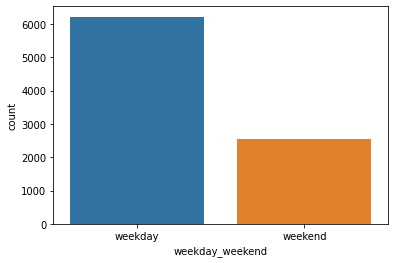

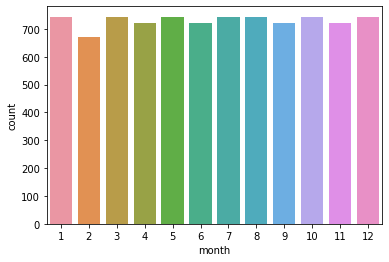

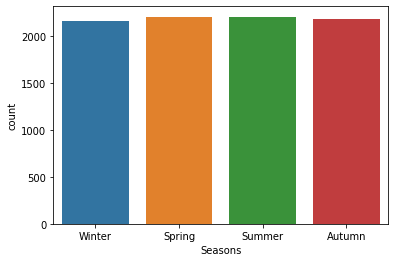

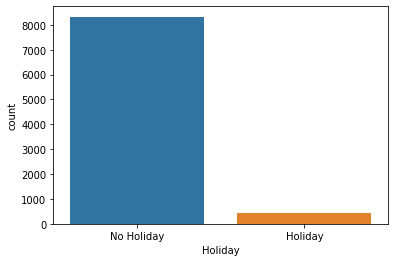

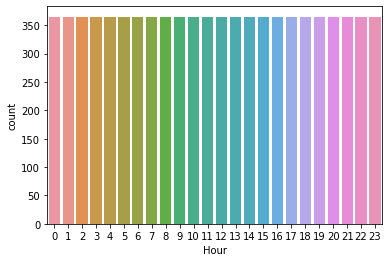

In [ ]:
# bar plot for categorical features
for catf in cat_features :
    sns.countplot(x = dataset[catf],)
    plt.show()

###**Bivariate Analysis :**

In [ ]:
dataset.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekday_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

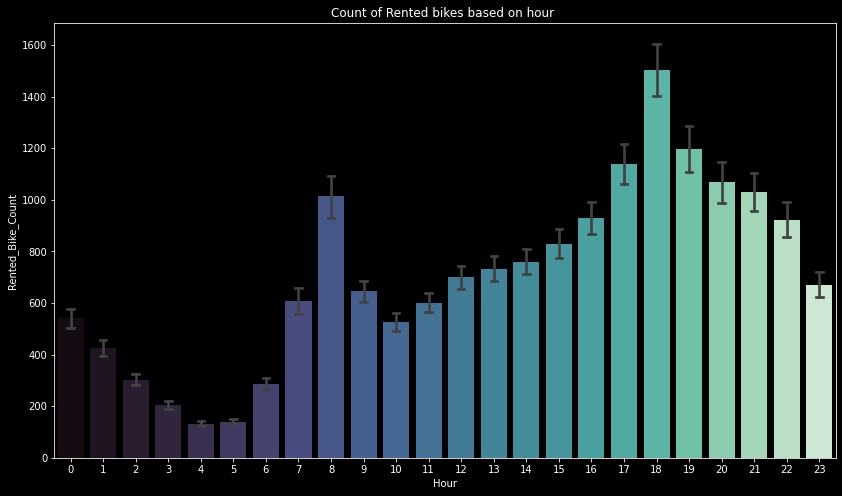

In [ ]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

**From above bar plot we conclude that People generally use rented bikes in morning from 7am to 9am and at evening time 5pm to 8pm.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

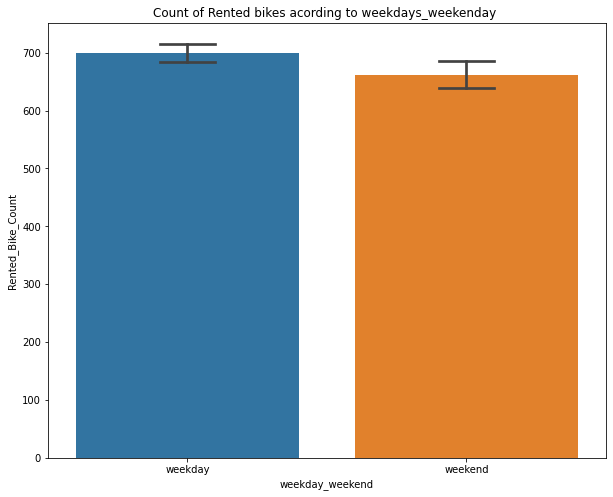

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='weekday_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

**Weekday has maximum bike count than weekend from above plot we conclude.**

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

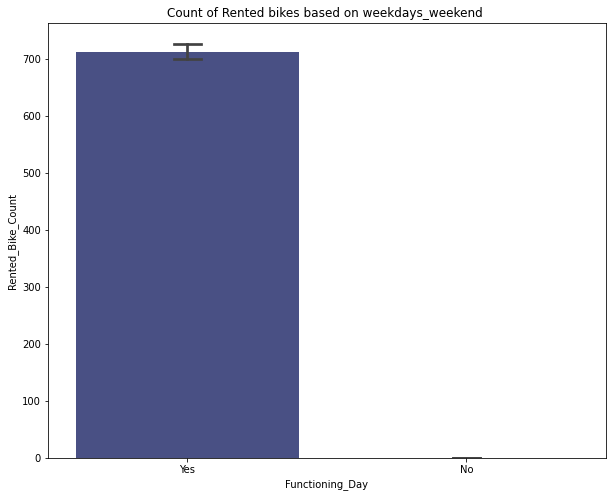

In [ ]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

**People use rented bike only in functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

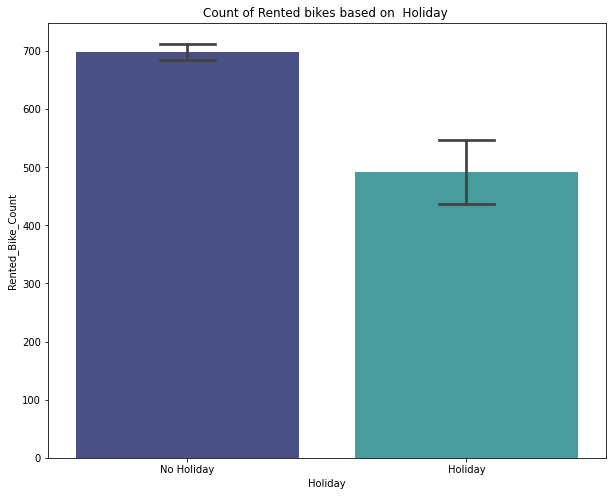

In [ ]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

**Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.**

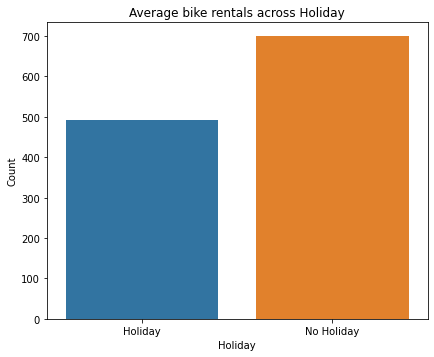

In [ ]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(dataset.groupby(['Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

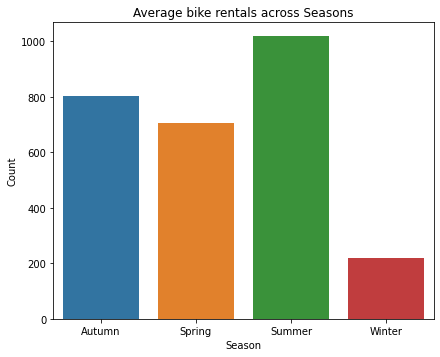

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(dataset.groupby(['Seasons'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Seasons', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')
plt.show()

**Finding Correlation between dependent and independant variables**

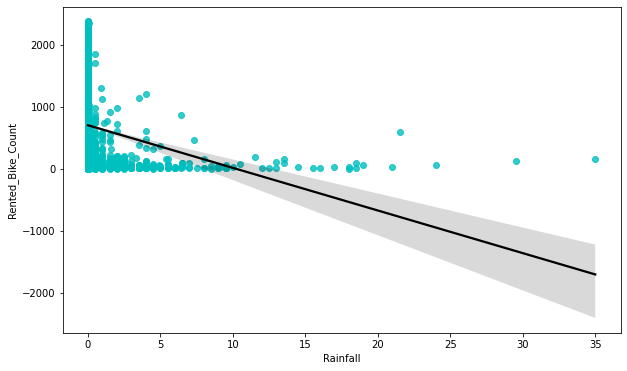

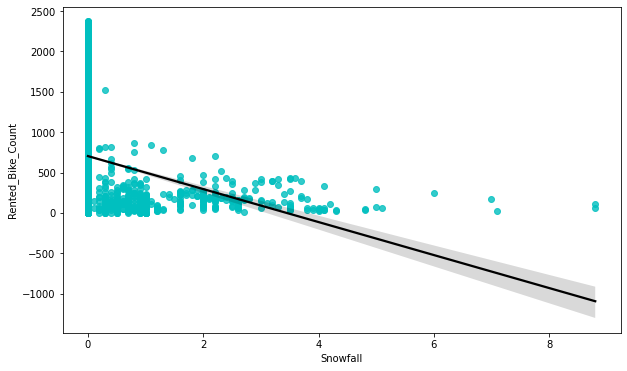

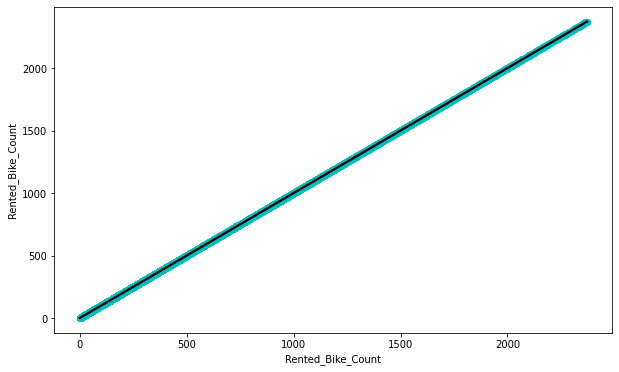

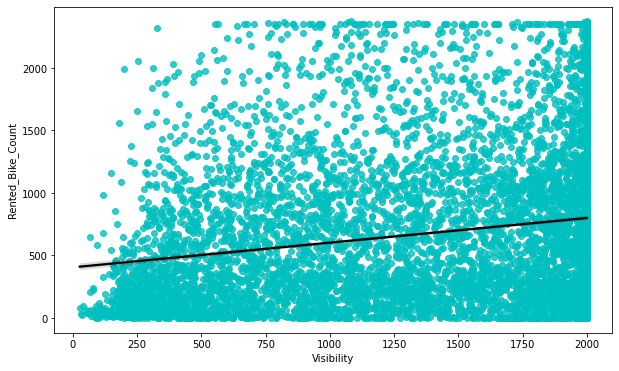

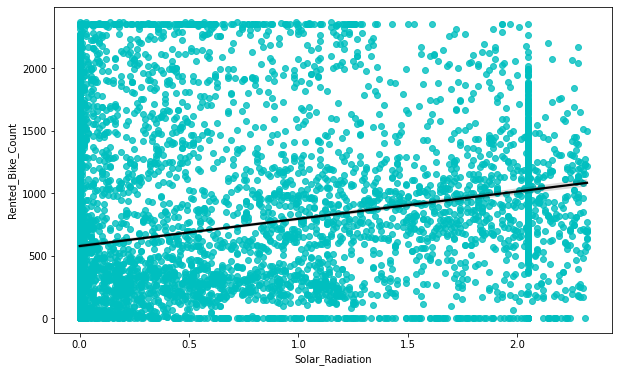

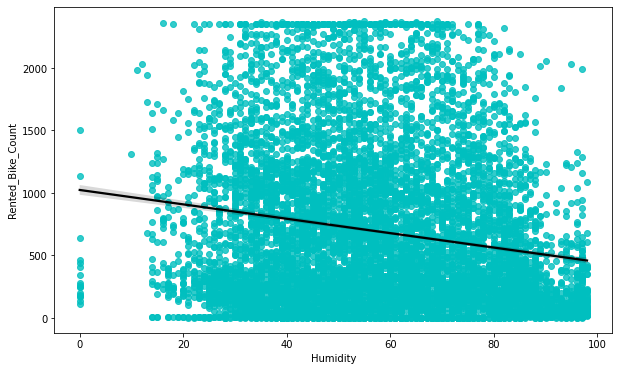

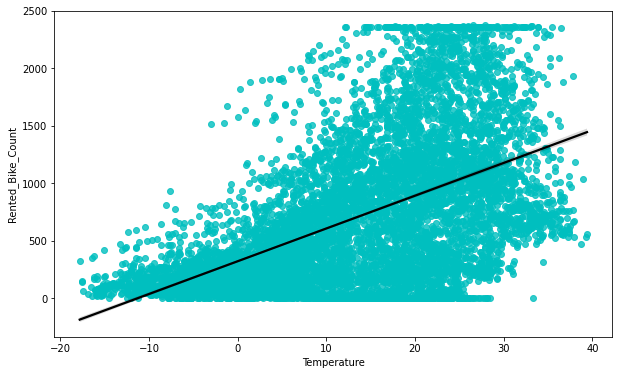

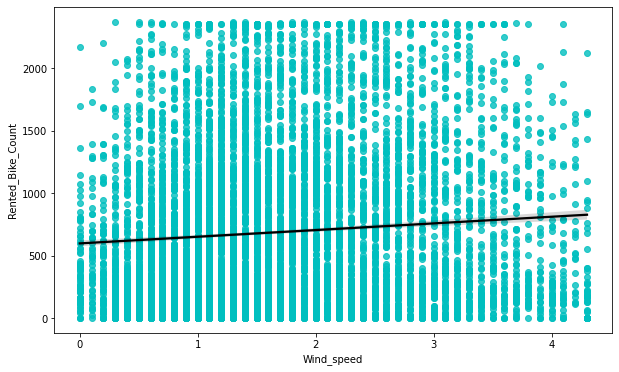

In [ ]:
#plotting the regression plot for all the numerical features
for fet in num_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[fet],y=dataset['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

**Observations:**


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.


In [ ]:
# creating a dataframe containing the count of bikes rented in different temperature

dataset_temp = pd.DataFrame(dataset.groupby('Temperature')['Rented_Bike_Count'].sum())
dataset_temp.reset_index(inplace=True)
dataset_temp

,Temperature,Rented_Bike_Count
0,-17.8,322.0
1,-17.5,291.0
2,-17.4,64.0
3,-16.9,36.0
4,-16.5,96.0
...,...,...
541,38.0,1184.0
542,38.7,475.0
543,39.0,1033.0
544,39.3,531.0


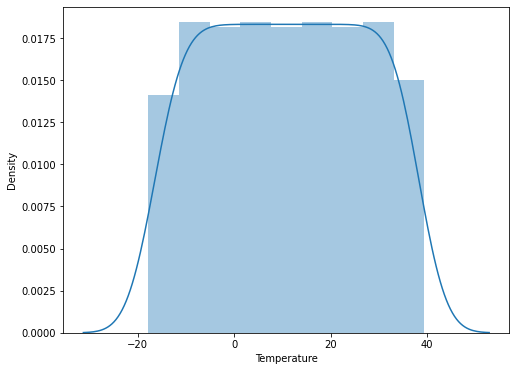

In [ ]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(dataset_temp['Temperature'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [ ]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

dataset_visi = pd.DataFrame(dataset.groupby('Visibility')['Rented_Bike_Count'].sum())
dataset_visi.reset_index(inplace=True)

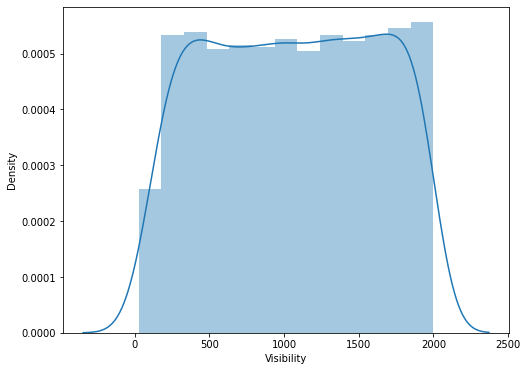

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(dataset_visi['Visibility'])

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
dataset=dataset.drop('month',axis=1)

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset1 = pd.get_dummies(dataset,drop_first=True,sparse=True)
dataset1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,254.0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,204.0,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,173.0,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,107.0,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,78.0,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   float64 
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(3)
memory usage: 770.9+ KB


In [ ]:
dataset.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,weekday_weekend
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
1,204.0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
2,173.0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
3,107.0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
4,78.0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   float64 
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(3)
memory usage: 770.9+ KB


In [ ]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

             feature   VIF
0           Rainfall  1.10
1           Snowfall  1.12
2  Rented_Bike_Count  3.38
3         Visibility  4.77
4    Solar_Radiation  2.34
5           Humidity  4.80
6        Temperature  4.32
7         Wind_speed  4.36


###**Normalising Rented_Bike_Count Column Data.**


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.


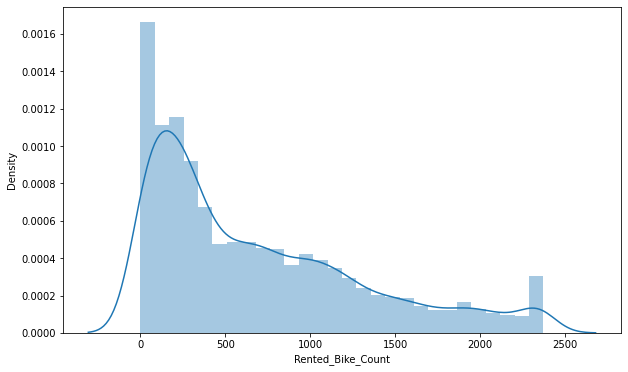

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((dataset1['Rented_Bike_Count']))

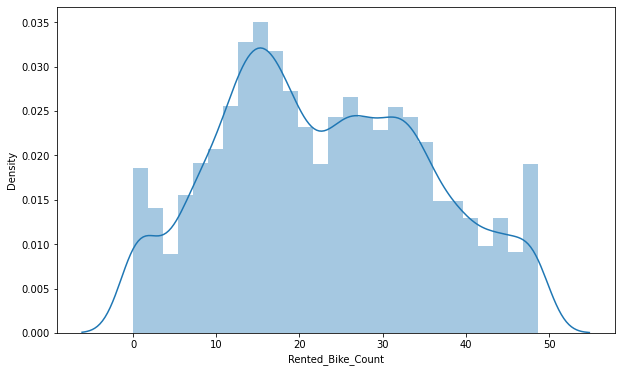

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(dataset1['Rented_Bike_Count']))

**Model Training**

**Separating dependant and independant variables**

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = dataset1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(dataset1['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
dataset1.isna().sum()

Rented_Bike_Count          0
Temperature                0
Humidity                   0
Wind_speed                 0
Visibility                 0
Solar_Radiation            0
Rainfall                   0
Snowfall                   0
Hour_1                     0
Hour_2                     0
Hour_3                     0
Hour_4                     0
Hour_5                     0
Hour_6                     0
Hour_7                     0
Hour_8                     0
Hour_9                     0
Hour_10                    0
Hour_11                    0
Hour_12                    0
Hour_13                    0
Hour_14                    0
Hour_15                    0
Hour_16                    0
Hour_17                    0
Hour_18                    0
Hour_19                    0
Hour_20                    0
Hour_21                    0
Hour_22                    0
Hour_23                    0
Seasons_Spring             0
Seasons_Summer             0
Seasons_Winter             0
Holiday_No Hol

# **Implementing Linear Regression.**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape


(6570, 36)


(2190, 36)

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# initalizing the model
regg = LinearRegression().fit(X_train_std ,y_train)

In [ ]:
# Checking score
regg.score(X_train_std,y_train)

0.712556527657138

In [ ]:
#Checking Coefficent
regg.coef_

array([ 5.02034762e+00, -2.74401684e+00, -1.06665970e+00,  4.74279692e-02,
        1.51641899e+00, -1.68039574e+00,  4.31666121e-03, -4.39620644e-01,
       -1.08258809e+00, -1.53701542e+00, -1.94846022e+00, -1.84160735e+00,
       -9.11482368e-01,  3.22427679e-01,  1.33045880e+00,  2.33713252e-02,
       -9.07740382e-01, -8.89459779e-01, -8.39620062e-01, -8.11313859e-01,
       -9.07065013e-01, -6.52267511e-01, -6.28498903e-02,  6.48786810e-01,
        1.84088307e+00,  1.48324915e+00,  1.25730660e+00,  1.33094852e+00,
        1.05264958e+00,  2.91575144e-01, -1.34853977e+00, -1.10418449e+00,
       -3.30691261e+00,  6.48692451e-01,  4.75166921e+00, -2.68910200e-01])

In [ ]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train_std)
y_pred_test = regg.predict(X_test_std)

In [ ]:
y_pred_test[:6]

array([13.65186463, 23.43230626, 15.52557683, 15.47876033, 32.44444917,
       18.48005418])

In [ ]:
y_test[:6]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 45.10849802031856
RMSE : 6.716286028775022
MAE : 5.010819806438276
R2 : 0.712556527657138
Adjusted R2 : 0.7077502271442058


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 44.52929359570537
RMSE : 6.6730273186691935
MAE : 4.964711444356373
R2 : 0.7219730963660735
Adjusted R2 : 0.7173242489295564


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

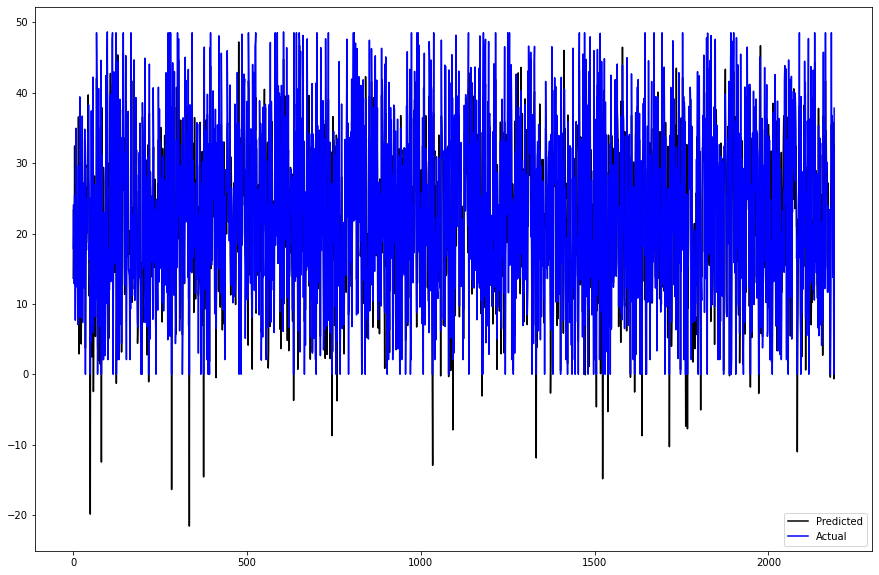

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

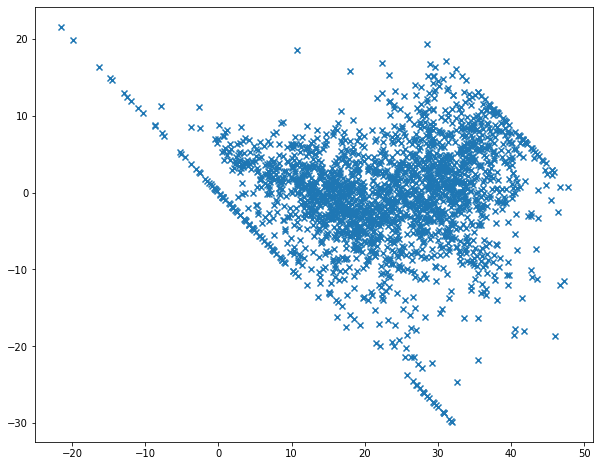

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Lasso regression** (L1 Regularization)

In [ ]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train_std, y_train)

# Creating the model score
print(lasso.score(X_test_std, y_test))
print(lasso.score(X_train_std, y_train))


0.5943773379553561
0.5881092410222424


In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train_std)
y_pred_test_lasso=lasso.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 64.6380080733709
RMSE : 8.039776618375097
MAE : 6.186971655398607
R2 : 0.5881092410222424
Adjusted R2 : 0.5812220755214532


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 64.96526189076863
RMSE : 8.060103094301502
MAE : 6.193493196546563
R2 : 0.5943773379553561
Adjusted R2 : 0.5875949803921386


In [ ]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

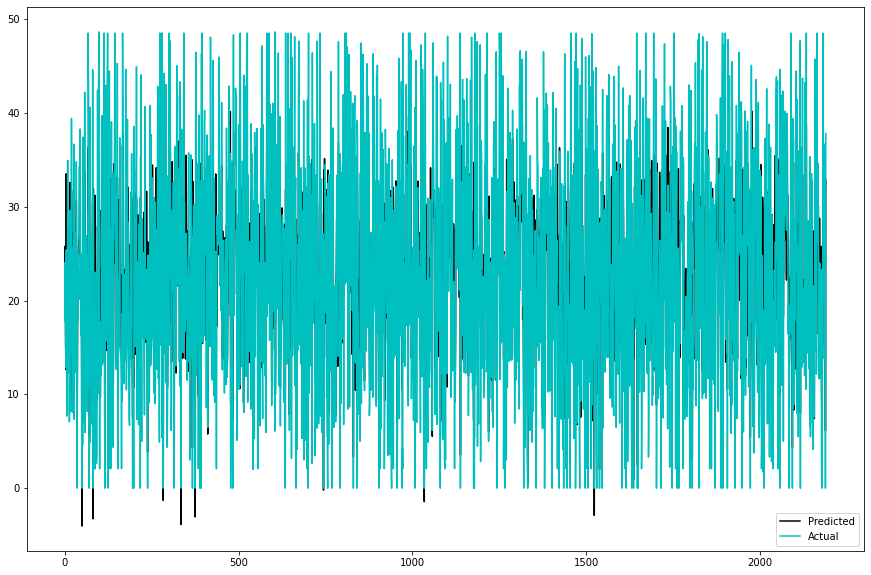

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge regression** (L2 Regularization)

In [ ]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score
ridge.score(X_train_std,y_train)

0.7125565273348293

In [ ]:
# Predicted Train & Test values
y_pred_train_ridge=ridge.predict(X_train_std)
y_pred_test_ridge=ridge.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 45.10849807089843
RMSE : 6.716286032540486
MAE : 5.010820251397253
R2 : 0.7125565273348293
Adjusted R2 : 0.7077502268165079


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 44.52935577831763
RMSE : 6.6730319779181055
MAE : 4.9647235799158125
R2 : 0.7219727081174006
Adjusted R2 : 0.7173238541890339


In [ ]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

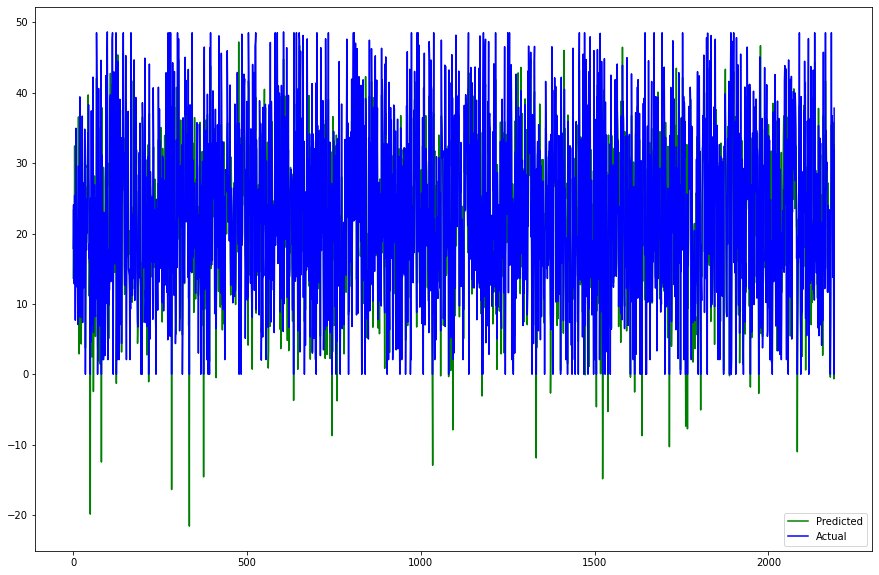

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='g')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

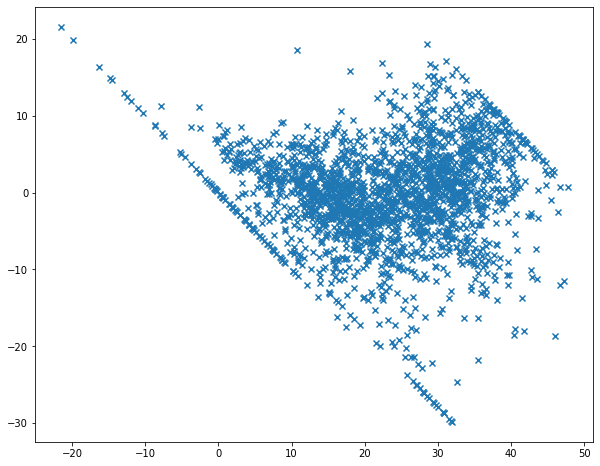

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasnet.fit(X_train_std,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elasnet.score(X_train_std, y_train)

0.7076666634905255

In [ ]:
# Train Test values
y_pred_train_en=elasnet.predict(X_train_std)
y_pred_test_en=elasnet.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 45.87586430030895
RMSE : 6.773172395584579
MAE : 5.06573600585975
R2 : 0.7076666634905255
Adjusted R2 : 0.7027786002697447


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 45.50677124027953
RMSE : 6.745870680666768
MAE : 5.051400507800933
R2 : 0.7158700333945436
Adjusted R2 : 0.711119137529334


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

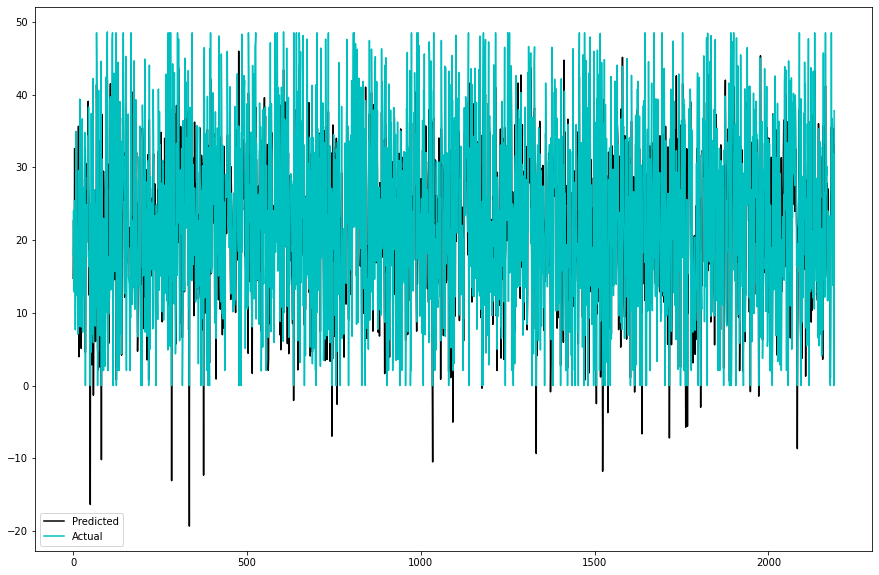

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

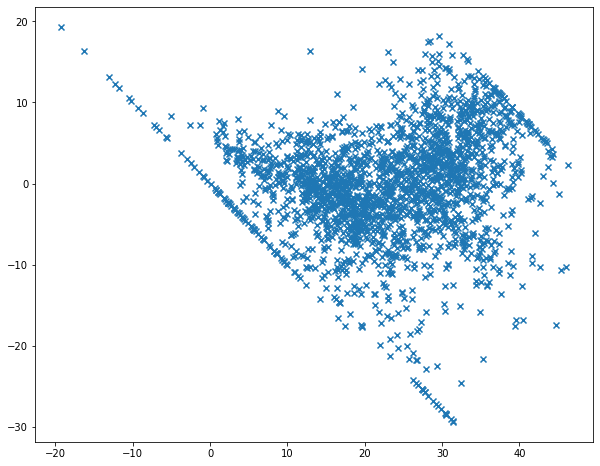

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regr = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regr.predict(X_train)
y_pred_test_d = dt_regr.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 40.192269751633745
RMSE : 6.339737356676044
MAE : 4.710118649956305
R2 : 0.743884055426836
Adjusted R2 : 0.7396015779513907


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 43.85500194245258
RMSE : 6.6223109216083005
MAE : 4.810203390450319
R2 : 0.7261831613673776
Adjusted R2 : 0.7216047098156941


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

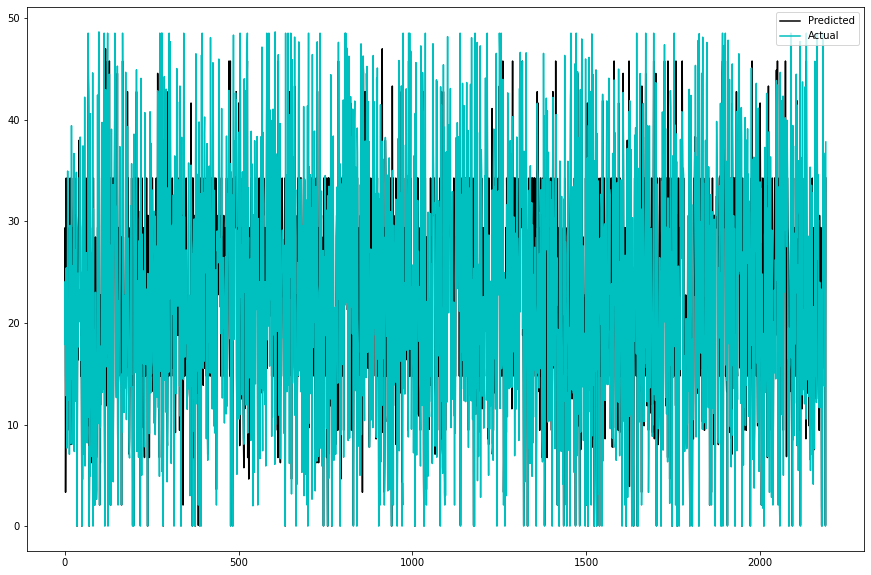

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

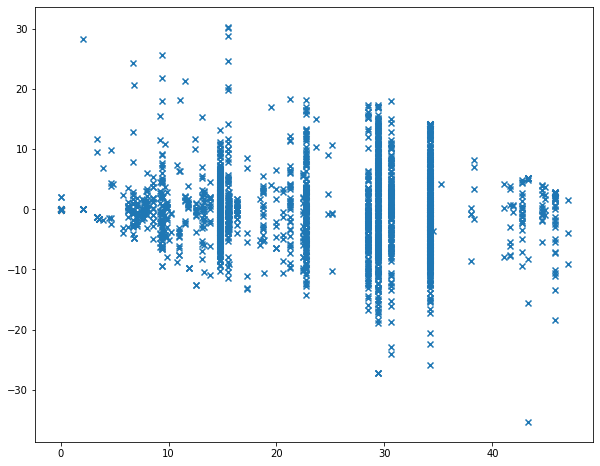

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression** 

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.3112029122782642
RMSE : 1.5202640929385474
MAE : 0.9962313795738924
R2 : 0.9852723939046927
Adjusted R2 : 0.9850261357442509


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 16.429285997300784
RMSE : 4.053305564264898
MAE : 2.634552210522422
R2 : 0.8974207056546187
Adjusted R2 : 0.8957054921866978


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
rf_model.feature_importances_

array([3.11657033e-01, 1.53240836e-01, 5.13097901e-02, 1.76939790e-02,
       3.38244110e-02, 3.49076117e-02, 1.43951236e-03, 4.21911279e-03,
       1.34873148e-02, 1.95624207e-02, 2.68367013e-02, 2.41745444e-02,
       8.05068766e-03, 3.60831986e-03, 1.36340216e-02, 1.07608064e-03,
       2.44044439e-03, 1.10447215e-03, 2.63314903e-04, 3.77336125e-04,
       7.86177817e-04, 1.48022648e-03, 4.38604064e-03, 1.02841090e-02,
       2.17588085e-02, 1.61125256e-02, 1.30257675e-02, 1.36693710e-02,
       1.10112540e-02, 4.63451425e-03, 7.74610547e-03, 1.77759047e-03,
       1.00121780e-02, 3.59019335e-03, 1.47364613e-01, 9.45258095e-03])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.style.use('dark_background')

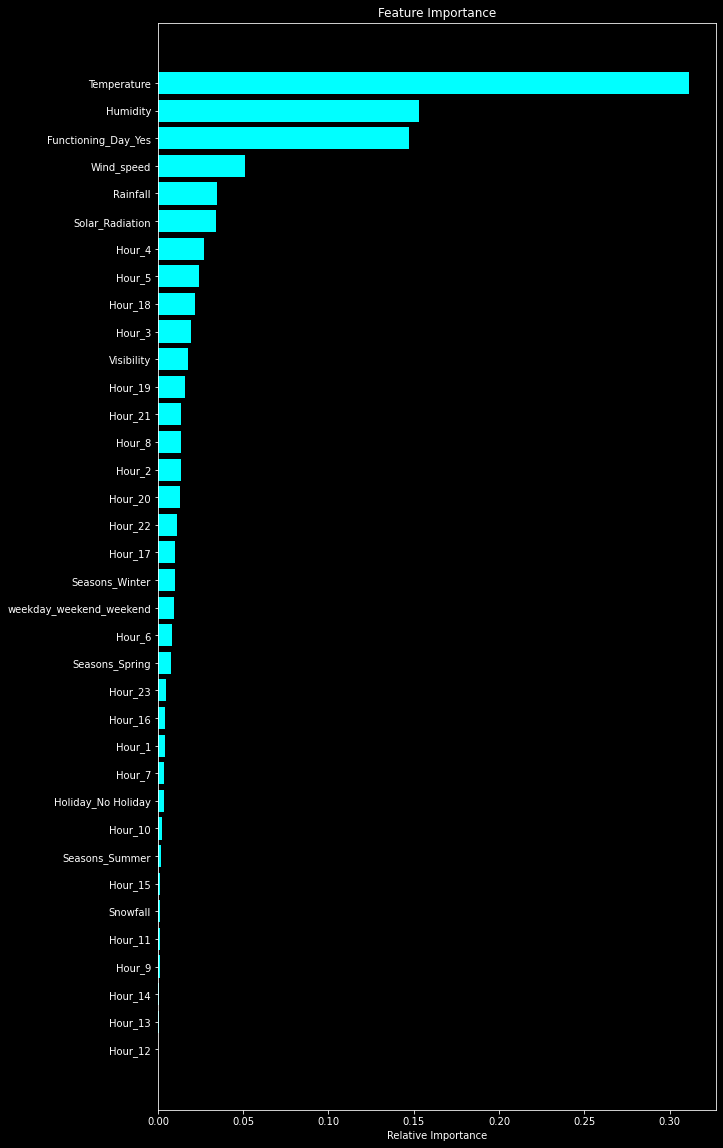

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset2 = pd.get_dummies(dataset,drop_first=True,sparse=False) 


In [ ]:
x = dataset2.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset2 ['Rented_Bike_Count'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   Rented_Bike_Count        8760 non-null   float64         
 1   Temperature              8760 non-null   float64         
 2   Humidity                 8760 non-null   int64           
 3   Wind_speed               8760 non-null   float64         
 4   Visibility               8760 non-null   int64           
 5   Solar_Radiation          8760 non-null   float64         
 6   Rainfall                 8760 non-null   float64         
 7   Snowfall                 8760 non-null   float64         
 8   Hour_1                   8760 non-null   Sparse[uint8, 0]
 9   Hour_2                   8760 non-null   Sparse[uint8, 0]
 10  Hour_3                   8760 non-null   Sparse[uint8, 0]
 11  Hour_4                   8760 non-null   Sparse[uint8, 0]
 12  Hour_5

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8760 non-null   float64
 1   Temperature              8760 non-null   float64
 2   Humidity                 8760 non-null   int64  
 3   Wind_speed               8760 non-null   float64
 4   Visibility               8760 non-null   int64  
 5   Solar_Radiation          8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7                  

In [ ]:
# Initializing the model
xgb_r = XGBRegressor()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   float64 
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(3)
memory usage: 770.9+ KB


In [ ]:
#Fitting the model
xgb_r.fit(x_train, y_train)

[07:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Train Test values
y_pred_train_xgb1 = xgb_r.predict(x_train)
y_pred_test_xgb1 = xgb_r.predict(x_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 22.888657142374605
RMSE : 4.784209144924018
MAE : 3.607481303379301
R2 : 0.8545682154502463
Adjusted R2 : 0.8521364717234506


In [ ]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 24.847485099525432
RMSE : 4.984725177933627
MAE : 3.7682510752988296
R2 : 0.8438197180675918
Adjusted R2 : 0.8412082502786616


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
xgb_r.feature_importances_

array([0.07639418, 0.04363266, 0.0429218 , 0.00381543, 0.03351216,
       0.05810369, 0.00659442, 0.0080472 , 0.0221596 , 0.04253275,
       0.06108895, 0.04880501, 0.02354257, 0.        , 0.02477222,
       0.        , 0.01415938, 0.01023561, 0.        , 0.        ,
       0.0012568 , 0.        , 0.00356238, 0.02142738, 0.04565118,
       0.04597431, 0.03253089, 0.04930476, 0.04521215, 0.00853235,
       0.0045687 , 0.00404453, 0.0540082 , 0.00988967, 0.14489475,
       0.00882441], dtype=float32)

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

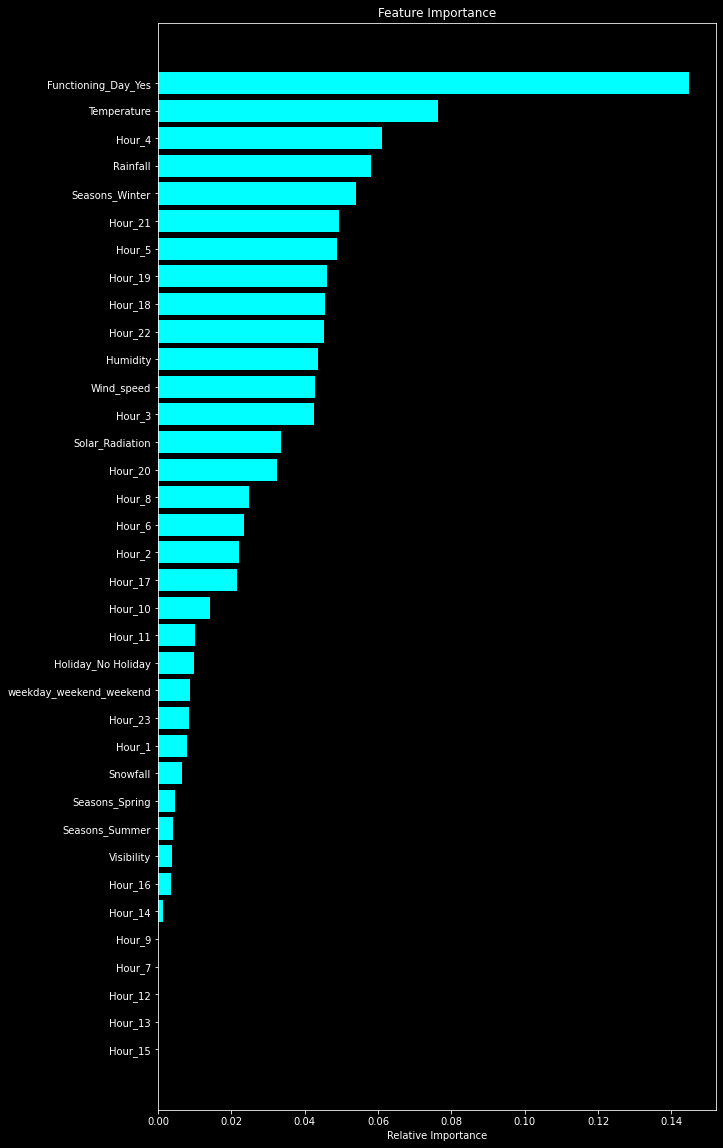

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**
## ***For improvement of our model let's do some Hyper parameter tuning.***

## **XG boost Regressor with GridSearchCV**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# Create an instance of the XG Boost Regressor
xg_boost = XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[07:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[07:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[07:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[07:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[07:20:31] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_optimal_model.fit(x_train,y_train)

[07:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(x_train)
y_pred_test_xg_opt= xg_optimal_model.predict(x_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 5.212428327703268
RMSE : 2.2830743149760298
MAE : 1.5665919043747871
R2 : 0.9668808550532149
Adjusted R2 : 0.9663270746453727


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.83645674009095
RMSE : 3.8518121371753
MAE : 2.6189563368446382
R2 : 0.9067446066568066
Adjusted R2 : 0.9051852967820481


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
xg_optimal_model.feature_importances_

array([0.02012483, 0.01535422, 0.00661333, 0.00153925, 0.00598279,
       0.03247356, 0.00219587, 0.00634443, 0.03830064, 0.05391212,
       0.07702512, 0.07208007, 0.02483086, 0.0078451 , 0.0283579 ,
       0.00426616, 0.01372551, 0.0121508 , 0.00223253, 0.00184267,
       0.00255793, 0.00234554, 0.00674748, 0.02942217, 0.05835686,
       0.05759881, 0.04154264, 0.05092201, 0.0476524 , 0.01285414,
       0.00922127, 0.002045  , 0.04982948, 0.00400911, 0.1933164 ,
       0.00438109], dtype=float32)

In [ ]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

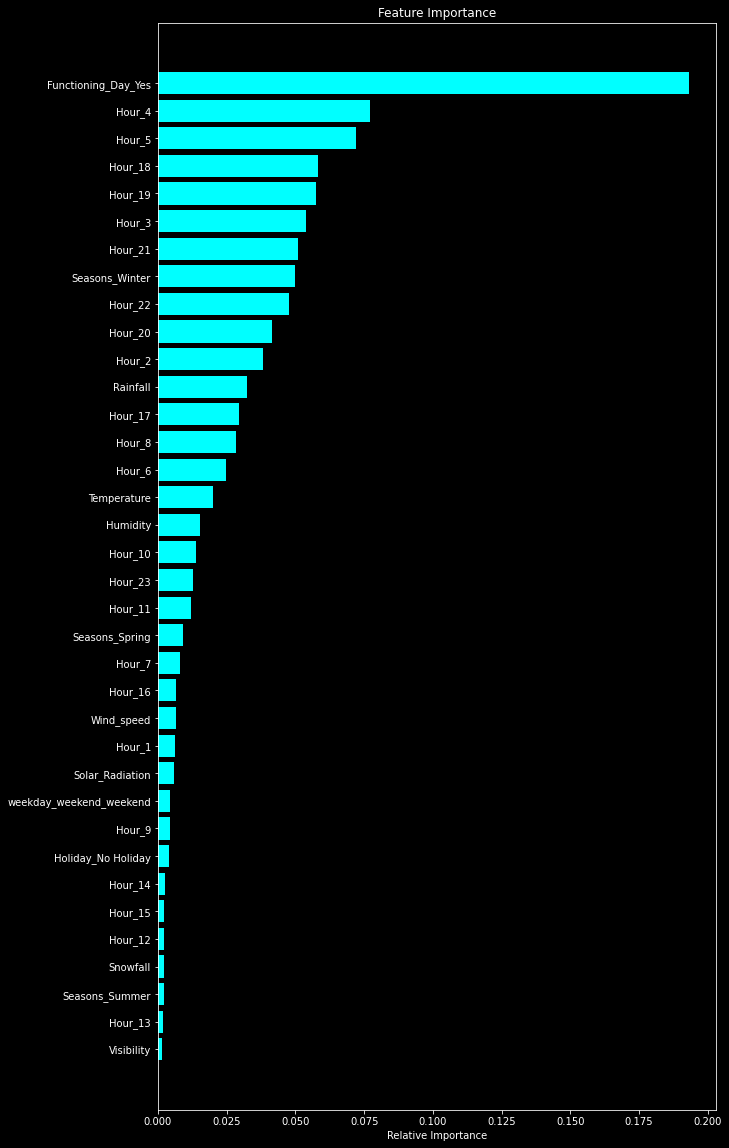

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   5.011  45.108  6.716  0.713   
             1            Lasso regression  6.187  64.638  8.040  0.588   
             2            Ridge regression  5.011  45.108  6.716  0.713   
             3       Elasticnet regression  5.066  45.876  6.773  0.708   
             4    Decision tree regression  4.710  40.192  6.340  0.744   
             5    Random forest regression  0.996   2.311  1.520  0.985   
             6         XG Boost Regression  3.607  22.889  4.784  0.855   
             7  XG boost regg GridserachCV  1.567   5.212  2.283  0.967   
Test set     0          Linear regression   4.965  44.529  6.673  0.722   
             1            Lasso regression  6.193  64.965  8.060  0.594   
             2            Ridge regression  4.965  44.529  6.673  0.722   
             3       Elasticnet regression  5.051  45.507  6.746  0.716   
             4    Decision tree regression  4.810  43.855  6.622  0.726   
             5    Random forest regression  2.635  16.429  4.053  0.897   
             6         XG Boost Regression  3.768  24.847  4.985  0.844   
             7  XG boost regg GridserachCV  2.619  14.836  3.852  0.907   

                Adj_R2  
Training set 0    0.71  
             1    0.58  
             2    0.71  
             3    0.70  
             4    0.74  
             5    0.99  
             6    0.85  
             7    0.97  
Test set     0    0.72  
             1    0.59  
             2    0.72  
             3    0.71  
             4    0.72  
             5    0.90  
             6    0.84  
             7    0.91

# **Final Observations:**

*    **Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**

*   **No overfitting is seen.**
*  **We can deploy XG Boost Gridsearch CV model.**


*   Hour of the day holds most importance among all the features for prediction of dataset
*   It is observed that highest number bike rentals counts in Autumn/fall Summer Seasons and the lowest in Spring season.
*   We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
*   As we can see the top 5 important features of our dataset are: Season_winter, Temperature, Hour, Humidity
*   Peoples dont use rented bikes in no functioning day
*   people tend to rent bikes when the temperature is between -5 to 25 degrees
*    people tend to rent bikes when the visibility is between 300 to 1700
*  for all the above experiments we can conclude that gradient boosting  and random forest regressor with using hyperparameters we got the best results
